# 머신 러닝 교과서 - 파이토치편

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/ml-with-pytorch/blob/main/ch13/ch13_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

## 패키지 버전 체크

check_packages.py 스크립트에서 로드하기 위해 폴더를 추가합니다:

In [59]:
import sys

# 코랩의 경우 깃허브 저장소로부터 python_environment_check.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
else:
    sys.path.insert(0, '..')

권장 패키지 버전을 확인하세요:

In [60]:
import sys
import os
import urllib.request

# 다운로드할 파일 정보
URL = "https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py"
FILENAME = "python_environment_check.py"



def ensure_file():
    """파일이 없으면 다운로드"""
    if not os.path.exists(FILENAME):
        print(f"Downloading {FILENAME} ...")
        urllib.request.urlretrieve(URL, FILENAME)
        print("Download complete.")
    else:
        print(f"{FILENAME} already exists.")

ensure_file()
#  VS Code / Jupyter 공통: 상위 디렉터리 import 허용
sys.path.insert(0, os.path.abspath(".."))

# 모듈 import
import python_environment_check


python_environment_check.py already exists.


In [61]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'torch': '1.8',
    'mlxtend': '0.19.0'
}
check_packages(d)

[OK] numpy 2.3.5
[OK] matplotlib 3.10.7
[OK] torch 2.9.1+cpu
[OK] mlxtend 0.24.0


In [62]:
import sys
print(sys.executable) # 이 경로가 패키지를 설치해야 할 대상 환경


c:\venvs\DS_Coding\Scripts\python.exe


ctrl + ~ ## 하단 터미널 열기, 같은 python 경로가 활성화되었는지 터미날에서 확인

### 터미널에서 실행
python -m pip install torch mlxtend


In [63]:
# 설치 확인
import torch
import mlxtend

print(torch.__version__)
print(mlxtend.__version__)


2.9.1+cpu
0.24.0


In [64]:
from python_environment_check import check_packages

d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'torch': '1.8',
    'mlxtend': '0.19.0'
}

check_packages(d)


[OK] numpy 2.3.5
[OK] matplotlib 3.10.7
[OK] torch 2.9.1+cpu
[OK] mlxtend 0.24.0


# 13장 - 파이토치 구조 자세히 알아보기 (파트 1/3)

**목차**

- 파이토치의 주요 특징
- 파이토치의 계산 그래프
  - 계산 그래프 이해
  - 파이토치로 그래프 만들기
- 모델 파라미터를 저장하고 업데이트하기 위한 파이토치 텐서 객체
- 자동 미분으로 그레이디언트 계산하기
  - 훈련 가능한 변수에 대한 손실의 그레이디언트 계산
  - 자동 미분 이해하기
  - 적대 샘플
- `torch.nn` 모듈을 사용해 일반적인 아키텍처 구현하기
  - `nn.Sequential` 기반의 모델 구현하기
  - 손실 함수 선택하기
  - XOR 분류 문제 풀어 보기
  - `nn.Module`로 유연성이 높은 모델 만들기
  - 파이토치에서 사용자 정의 층 만들기

In [65]:
from IPython.display import Image
%matplotlib inline

## 파이토치의 주요 특징

## 파이토치의 계산 그래프

### 계산 그래프 이해

In [66]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch13/figures/13_01.png', width=400)

### 13.2.2 파이토치로 그래프 만들기

In [67]:
import torch

In [68]:
def compute_z(a, b, c):
    r1 = torch.sub(a, b) # r1 = a - b
    r2 = torch.mul(r1, 2) # r2 = 2 * (a- b)
    z = torch.add(r2, c)
    return z

print('스칼라 입력:', compute_z(torch.tensor(1), torch.tensor(2), torch.tensor(3)))
print('rank 랭크 1 입력:', compute_z(torch.tensor([1]), torch.tensor([2]), torch.tensor([3])))
print('rank 랭크 2 입력:', compute_z(torch.tensor([[1]]), torch.tensor([[2]]), torch.tensor([[3]])))
# rank = tensor 차원 수
# rank 2 = (batch_size, features)

스칼라 입력: tensor(1)
rank 랭크 1 입력: tensor([1])
rank 랭크 2 입력: tensor([[1]])


## 13.3 모델 파라미터를 저장하고 업데이트하기 위한 파이토치 텐서 객체

In [69]:
# gradient를 계산할 수 있는 텐서 설정 > float 텐서만 해당 + required_grad = True 지정해야 
a = torch.tensor(3.14, requires_grad=True)
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(a)
print(b)

tensor(3.1400, requires_grad=True)
tensor([1., 2., 3.], requires_grad=True)


In [70]:
a.requires_grad

True

In [71]:
w = torch.tensor([1.0, 2.0, 3.0]) # requires_grad 기본 값은 false

print(w.requires_grad)

False


In [72]:
w.requires_grad_() # _가 붙은 메소드 > in-place 변경 > w 객체가 변경됨
  ## autograd 추적 on으로 설정 > 연산 그래프에 기록
  ## in-place 변경
  ## leaf tensor
print(w.requires_grad)

True


In [73]:
import torch.nn as nn


torch.manual_seed(1) # 난수 생성기의 시드(seed)를 1로 고정
w = torch.empty(2, 3) # shape이 (2, 3)인 2×3 텐서 생성
  ## 값은 초기화하지 않음 (메모리에 남아 있던 쓰레기 값)
nn.init.xavier_normal_(w) # 텐서 w를 Xavier (Glorot) 정규분포 초기화로 채움, in-place 초기화
print(w)


tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


왜 Xavier 초기화를 쓰는가?

 - 신경망 앞/뒤 층에서 분산이 유지

 - gradient가 폭발하거나 소실되는 문제 완화

 - 시그모이드 / tanh 계열에 특히 효과적

   > “학습이 잘 되도록 가중치의 크기를 조절

In [74]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2, 3, requires_grad=True)
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1, 2, requires_grad=True)
        nn.init.xavier_normal_(self.w2)

## 13.4 자동 미분으로 그레이디언트 계산하기

### 13.4.1 훈련 가능한 변수에 대한 손실의 그레이디언트 계산

z=wx+b

loss=(y−z)^2

∂loss/∂w = ∂loss/∂z ⋅ ∂z/∂w

∂loss/ ∂z = −2(y−z)

∂z/∂w = x

In [75]:
w = torch.tensor(1.0, requires_grad=True) # leaf 노드 - 편미분은 리프에 대해서만 한다 > gradient를 저장한다 
b = torch.tensor(0.5, requires_grad=True) # leaf 노드

x = torch.tensor([1.4])
y = torch.tensor([2.1])


z = torch.add(torch.mul(w, x), b)

loss = (y-z).pow(2).sum()
loss.backward() # loss를 기준으로 모든 leaf 노드에 대해 연쇄법칙(chain rule)을 이용해 편미분을 계산
        ## 메서드 backward()가 미분을 실행: w, b에 대하여

print('dL/dw : ', w.grad)
print('dL/db : ', b.grad)

dL/dw :  tensor(-0.5600)
dL/db :  tensor(-0.4000)


In [76]:
# 계산된 그레이디언트 dL/dw 검증하기
print(2 * x * ((w * x + b) - y))    # dLoss/dw = -2(y - z) * x

tensor([-0.5600], grad_fn=<MulBackward0>)


## 13.4.2 자동 미분 이해하기 

y=g(h(x)), h(x)=2x,g(u)=u^2, y=(2x)^2

1) forward 미분: dy/dx = 8x

-  x를 1만큼 바꾸면 y는 얼마나 영향을 받는가?”

- x = 3일 때 x를 조금 증가시키면 y는 24만큼 증가한다

2) backward 미분: “y를 기준으로 했을 때, 각 변수(x 포함)가 y에 얼마나 영향을 주었는가”

- “y의 변화량 1이 x의 변화에서 얼마나 기인했는가?”

- backward: y -> x를 계산

- backward의 출발점: dy/dy = 1 ## “y 변화량을 1로 두고 시작”

- y -> u로 영향 전달: y = u^2 > dy/du = 2u = 12

  x = 3, u = h(x) = 2x = 6, y = g(u) = 36

  ## “u가 1 변하면 y는 12 변한다” → y의 변화 1은 u에 12의 책임이 있다

- u → x로 영향 전달: u = 2x, du/dx = 2

  dy/dx = dy/du . du/dx = 12 x 2 = 24

  ## x가 1 변하면 u는 2배 변한다

딥러닝에서 왜 “backward”라고 부르나?

- 딥러닝에서는 보통:

  > 출력: loss (1개)

  > 입력/파라미터: 수십만 개

- 그래서:

  > loss에서 시작해서 각 파라미터가 loss에 끼친 영향을 뒤로 전달하는 계산 방식

→ backward propagation

## 13.5  `torch.nn` 모듈을 사용해 일반적인 아키텍처 구현하기

### 13.5.1  `nn.Sequential` 기반의 모델 구현하기

nn.Sequential의 정확한 의미:

x → Linear(4→16) → ReLU → Linear(16→32) → ReLU → output

- 사용자는 forward를 직접 작성할 필요가 없음

- h1 = ReLU(W1x = b1), h2 = ReLU(W2h1 + b2)

nn.Sequential 실제 내부 동작 (forward 개념)

def forward(x):
    x = linear1(x)
    x = relu1(x)
    x = linear2(x)
    x = relu2(x)
    return x


In [77]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)

model


Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

PyTorch L2 규제 = Ridge 규제

- 딥러닝에서는 L2 규제 = weight decay 라고 부름

optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01,
    weight_decay=1e-4
)


PyTorch L1 규제 = Lasso 규제 

nn.L1Loss는 규제가 아님 (중요)

nn.L1Loss() # 예측 오차를 |y − ŷ|로 측정하는 손실 함수

PyTorch에서 L1 규제를 하려면 이렇게 해야 함:

  l1_lambda = 1e-4

  l1_norm = sum(p.abs().sum() for p in model.parameters())

  loss = mse_loss + l1_lambda * l1_norm



#### 층 설정하기

 * 초기화 `nn.init`: https://pytorch.org/docs/stable/nn.init.html
 * L1 규제 `nn.L1Loss`: https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
 * L2 규제 `weight_decay`: https://pytorch.org/docs/stable/optim.html
 * 활성화 함수: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity  

In [78]:
nn.init.xavier_uniform_(model[0].weight)

l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum() # “L1 규제항(L1 penalty)을 계산한 것

## 13.5.2 손실 함수 선택하기

In [79]:
loss_fn = nn.BCELoss() # 이진 교차 엔트로피 > 이진 분류 손실 함수
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
# 모델의 모든 가중치를 확률적 경사하강법(SGD)으로, 학습률 = 0.001

## 13.5.3 XOR 분류 문제 풀어 보기

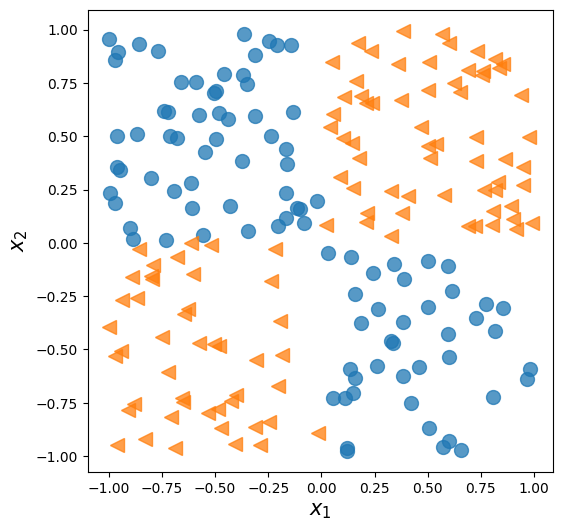

In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

#plt.savefig('figures/13_02.png', dpi=300)
plt.show()

In [81]:
from torch.utils.data import DataLoader, TensorDataset


train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [82]:
# 로지스틱 회귀 (Logistic Regression)
model = nn.Sequential(
    nn.Linear(2, 1), # 입력 특성(feature)이 2개이고, 출력 유닛(neuron)이 1개인 선형 출력층
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [83]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [84]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

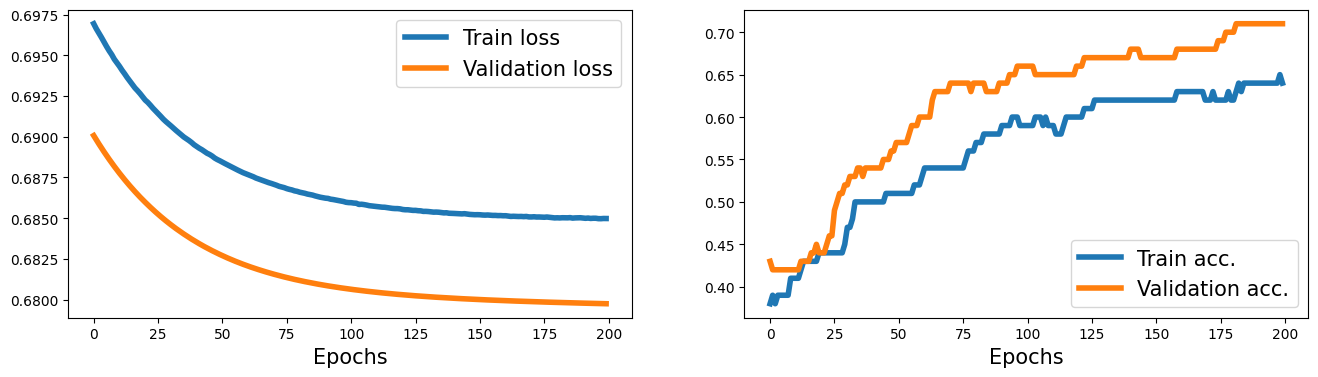

In [85]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

#plt.savefig('figures/13_03.png', dpi=300)

In [86]:
import numpy as np
import torch
import torch.nn as nn

# 데이터 생성
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1] < 0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)


model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 간단한 학습
for epoch in range(1000):
    optimizer.zero_grad()
    pred = model(x_train).squeeze()
    loss = criterion(pred, y_train)
    loss.backward()
    optimizer.step()

model.eval()

with torch.no_grad():
    pred_prob = model(x_valid)[:, 0]   # (N, 1) → (N,)
    pred_label = (pred_prob >= 0.5).int()   # ⭐ 클래스(0/1)

for i in range(10):
    print(f"[{i}] "
          f"x={x_valid[i].numpy()}, "
          f"pred_prob={pred_prob[i].item():.3f}, "
          f"pred={pred_label[i].item()}, "
          f"true={y_valid[i].item()}")

accuracy = (pred_label == y_valid.int()).float().mean()
print("Validation accuracy:", accuracy.item())


[0] x=[0.34912804 0.59955305], pred_prob=0.471, pred=0, true=1.0
[1] x=[-0.8389409 -0.5365954], pred_prob=0.545, pred=1, true=1.0
[2] x=[-0.5847487   0.83466715], pred_prob=0.655, pred=1, true=0.0
[3] x=[0.42262903 0.10776922], pred_prob=0.402, pred=0, true=1.0
[4] x=[-0.39096403  0.6697081 ], pred_prob=0.606, pred=1, true=0.0
[5] x=[-0.12938808  0.84691244], pred_prob=0.582, pred=1, true=0.0
[6] x=[ 0.41210362 -0.04393739], pred_prob=0.387, pred=0, true=0.0
[7] x=[-0.7475798  0.9520871], pred_prob=0.692, pred=1, true=0.0
[8] x=[-0.6803327  -0.59479576], pred_prob=0.511, pred=1, true=1.0
[9] x=[-0.13763648 -0.1915962 ], pred_prob=0.463, pred=0, true=1.0
Validation accuracy: 0.3700000047683716


In [87]:
model = nn.Sequential( 
    nn.Linear(2, 4),    # 은닉층
    nn.ReLU(),
    nn.Linear(4, 4),    # 은닉층
    nn.ReLU(),
    nn.Linear(4, 1),    # 출력층
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [88]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

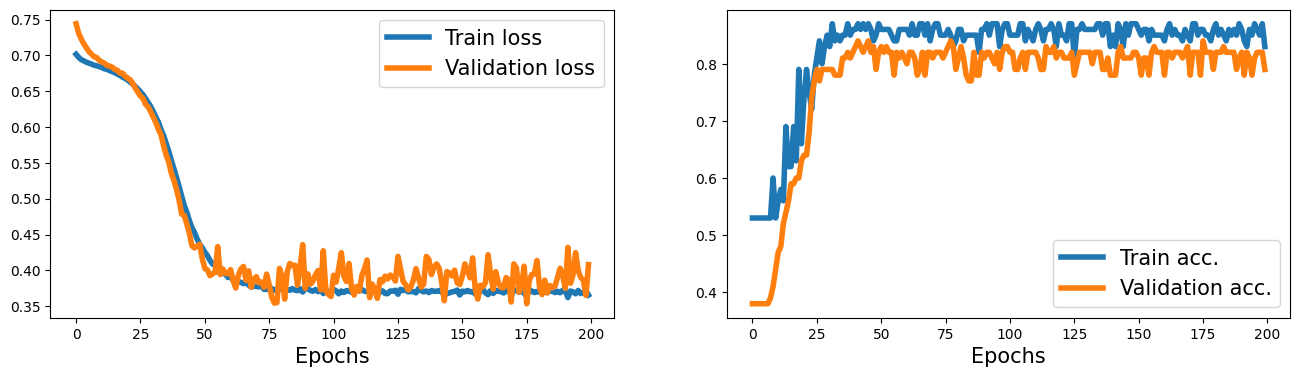

In [89]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

#plt.savefig('figures/13_04.png', dpi=300)

In [90]:
with torch.no_grad():
    pred_prob = model(x_valid)[:, 0]   # (N, 1) → (N,)
    pred_label = (pred_prob >= 0.5).int()   # ⭐ 클래스(0/1)

for i in range(10):
    print(f"[{i}] "
          f"x={x_valid[i].numpy()}, "
          f"pred_prob={pred_prob[i].item():.3f}, "
          f"pred={pred_label[i].item()}, "
          f"true={y_valid[i].item()}")

accuracy = (pred_label == y_valid.int()).float().mean()
print("Validation accuracy:", accuracy.item())


[0] x=[0.34912804 0.59955305], pred_prob=0.914, pred=1, true=1.0
[1] x=[-0.8389409 -0.5365954], pred_prob=0.899, pred=1, true=1.0
[2] x=[-0.5847487   0.83466715], pred_prob=0.039, pred=0, true=0.0
[3] x=[0.42262903 0.10776922], pred_prob=0.970, pred=1, true=1.0
[4] x=[-0.39096403  0.6697081 ], pred_prob=0.183, pred=0, true=0.0
[5] x=[-0.12938808  0.84691244], pred_prob=0.248, pred=0, true=0.0
[6] x=[ 0.41210362 -0.04393739], pred_prob=0.899, pred=1, true=0.0
[7] x=[-0.7475798  0.9520871], pred_prob=0.010, pred=0, true=0.0
[8] x=[-0.6803327  -0.59479576], pred_prob=0.961, pred=1, true=1.0
[9] x=[-0.13763648 -0.1915962 ], pred_prob=0.973, pred=1, true=1.0
Validation accuracy: 0.7900000214576721


##  13.5.4 `nn.Module`로 유연성이 높은 모델 만들기

forward()는 직접 호출되는 함수가 아니다. 

model(x)를 가능하게 만드는 것은 nn.Module.__call__() 이다.

pred = model(x)

  > pred = model.__call__(x)


PyTorch nn.Module의 핵심 던더 메소드 구조 (개념도)

class Module:
    def __call__(self, *args, **kwargs):
        # 1. forward 전처리 (hook 등)
        result = self.forward(*args, **kwargs)
        # 2. forward 후처리
        return result

model(x)

  > model.__call__(x)
 └─> model.forward(x)


In [91]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x

    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

model(x)가 실행될 때 실제 호출 순서:

model(x)
↓
MyModule.__call__(x)        ← nn.Module에서 상속
↓
MyModule.forward(x)        ← 우리가 정의한 함수
↓
for f in self.module_list:
       x = f(x)
↓
return x


In [92]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

# torch.manual_seed(1)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

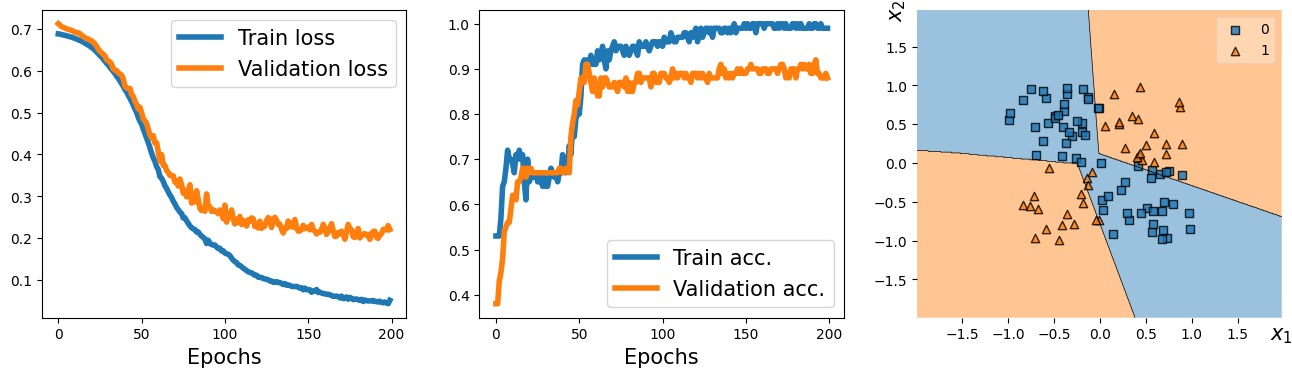

In [94]:
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

#plt.savefig('figures/13_05.png', dpi=300)
plt.show()

## 13.5.5 파이토치에서 사용자 정의 층 만들기

In [95]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)  # nn.Parameter는 모듈 파라미터 텐서입니다.
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev

    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b)

In [96]:
## 테스트:

torch.manual_seed(1)

noisy_layer = NoisyLinear(4, 2)

x = torch.zeros((1, 4))
print(noisy_layer(x, training=True))

print(noisy_layer(x, training=True))

print(noisy_layer(x, training=False))


tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)
tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)
tensor([[0., 0.]], grad_fn=<AddBackward0>)


In [97]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()

    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x

    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

torch.manual_seed(1)
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

In [98]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

torch.manual_seed(1)

loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, True)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_hist_train[epoch] += is_correct.mean()

    loss_hist_train[epoch] /= n_train/batch_size
    accuracy_hist_train[epoch] /= n_train/batch_size

    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    loss_hist_valid[epoch] = loss.item()
    is_correct = ((pred>=0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()

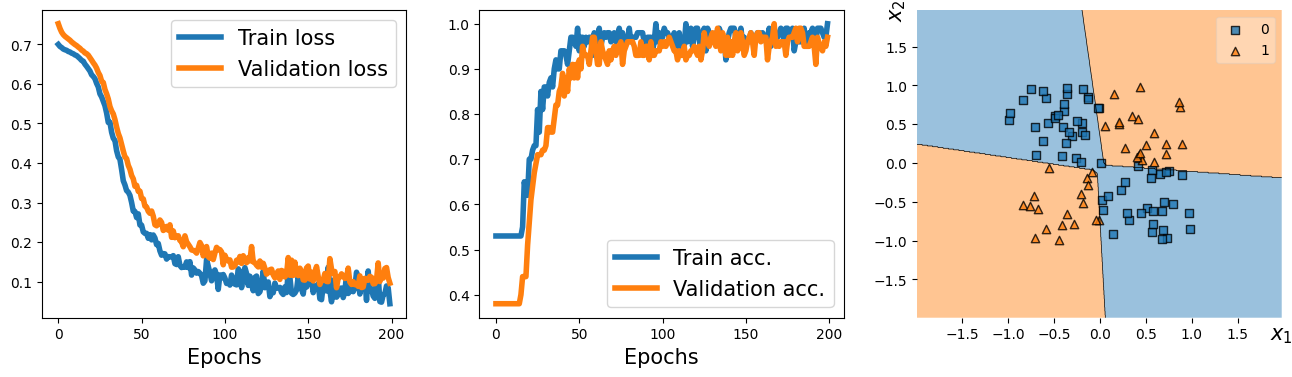

In [99]:
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

#plt.savefig('figures/13_06.png', dpi=300)
plt.show()